# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)

query1 = sales[sales["sales"]>10]
query2 = sales[sales["year"]==2018]
query3 = sales[~((sales["sales"]>13) & (sales["year"]==2018))]
query4 = sales[sales["sales"]/3>3]
query5 = sales[sales["employee"] > "J"]
query1, query2, query3, query4, query5

(  employee  sales  year
 0  Katrina     14  2018
 1   Guanyu     17  2019
 3    Roman     12  2018
 7   Alaina     15  2020,
   employee  sales  year
 0  Katrina     14  2018
 3    Roman     12  2018,
      employee  sales  year
 1      Guanyu     17  2019
 2         Jan      6  2020
 3       Roman     12  2018
 4  Jacqueline      8  2020
 5       Paola      3  2019
 6   Esperanza      7  2019
 7      Alaina     15  2020
 8      Egweyn      5  2020,
   employee  sales  year
 0  Katrina     14  2018
 1   Guanyu     17  2019
 3    Roman     12  2018
 7   Alaina     15  2020,
      employee  sales  year
 0     Katrina     14  2018
 2         Jan      6  2020
 3       Roman     12  2018
 4  Jacqueline      8  2020
 5       Paola      3  2019)

# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
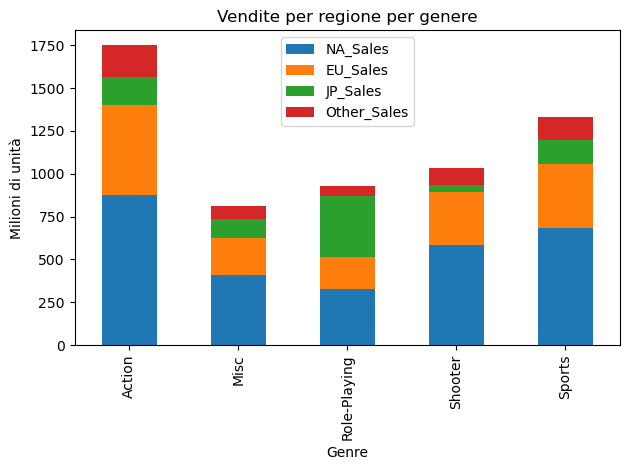


In [3]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Videogiochi pubblicati: 11493


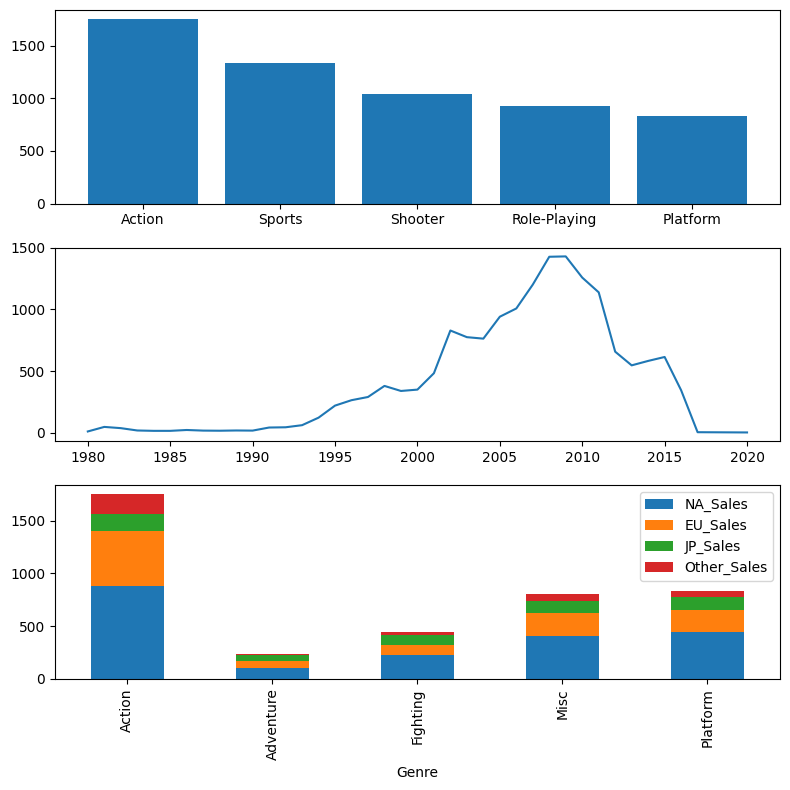

In [59]:
print("Videogiochi pubblicati: " + str(df["Name"].unique().shape[0]))

scale = 8
ratio = (1, 1)
fig, ax = plt.subplots(3, 1, figsize=(ratio[0]*scale, ratio[1]*scale))

sales_by_genre = df.groupby("Genre")["Global_Sales"].sum().reset_index().sort_values(by="Global_Sales", ascending=False).head(5)
ax[0].bar(sales_by_genre["Genre"], sales_by_genre["Global_Sales"])

ax[1].plot(df.groupby("Year")["Name"].count())

stacked_ales_by_genre = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().head()
# ax[2].bar(stacked_ales_by_genre["Genre"], sales_by_genre[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]], stacked=True)
stacked_ales_by_genre.plot(kind="bar", stacked=True, ax=ax[2])


plt.tight_layout()